In [2]:
#import tensorflow and tensorflow dataset
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
# importing helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


In [0]:
tf.enable_eager_execution()

In [9]:
# import fashion mnist dataset
dataset, metadata= tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset, test_dataset= dataset['train'], dataset['test']

In [0]:
class_names=['T-shirt/top','Trourser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [11]:
# Explore the data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [0]:
# preprocess the data

def normalize(images, lables):
  images=tf.cast(images, tf.float32)
  images /=255
  return images,lables

In [0]:
# call normalize function now
train_dataset= train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

In [0]:
## Explore the processed data

for image,lablel in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))

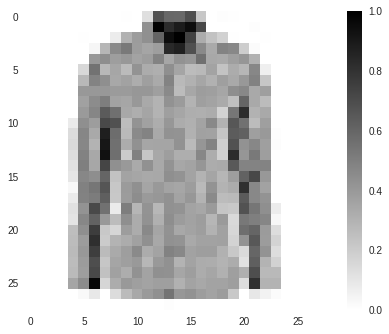

In [15]:
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

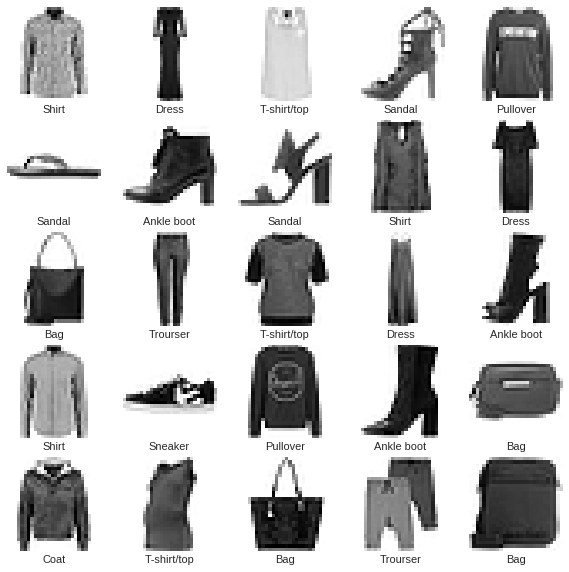

In [16]:
plt.figure(figsize=(10,10))
i=0
for(image,label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i +=1
plt.show()

In [0]:
# build the model

## setup layers
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [0]:
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# Train the model
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [20]:
model.fit(train_dataset, epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4924 - acc: 0.8287
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3746 - acc: 0.8648
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3353 - acc: 0.8786
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3104 - acc: 0.8865
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2955 - acc: 0.8921


In [21]:
# Evaluate accuracy
test_loss, test_accuracy=model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))


313/313 [==============================] - 3s 8ms/step - loss: 0.3592 - acc: 0.8727


In [0]:
# to enable auto complete
%config IPCompleter.greedy=True

In [0]:
## make predictions and explore
for test_image,test_labels in test_dataset.take(1):
  test_image=test_image.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_image)

In [24]:
predictions.shape

(32, 10)

In [25]:
predictions[0]

array([2.0885280e-05, 1.4497692e-07, 1.6084563e-02, 6.7980793e-05,
       1.0593755e-01, 6.7250291e-08, 8.7788552e-01, 7.4867419e-09,
       3.2074158e-06, 6.7106399e-08], dtype=float32)

In [26]:
np.argmax(predictions[0])

6

In [27]:
test_labels[0]

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

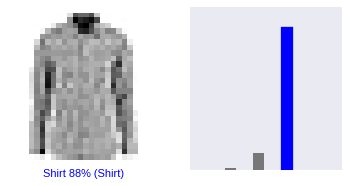

In [29]:
# 0th image 
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels,test_image)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

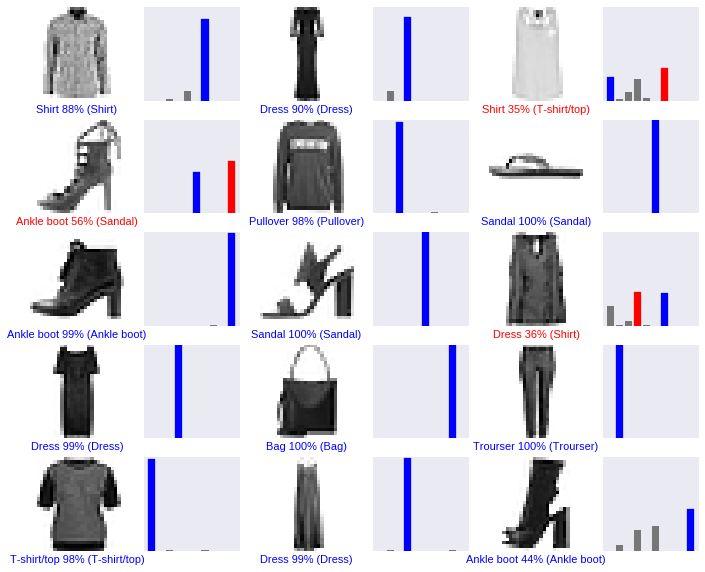

In [30]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)